<a href="https://colab.research.google.com/github/preethamlv/TEAM-B1/blob/fraud-detection/FraudDetection/ML_models/Supervised_Learning/LogisticRegressionModel/Fraud_detection_logisticRegression_Explainability2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import numpy as np
import pandas as pd
import joblib
from sklearn.metrics import *
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import *
import graphviz 
import pydotplus
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [5]:
scaler = joblib.load('/content/gdrive/MyDrive/Transaction data/scaler.pkl')

In [6]:
test = pd.read_csv('/content/gdrive/MyDrive/Transaction data/Copy of preprocessed_Testdata.csv')

In [ ]:
test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,week_day,year_month,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,week_day_Monday,week_day_Saturday,week_day_Sunday,week_day_Thursday,week_day_Tuesday,week_day_Wednesday,dist,val_aggr,trans_date,hist_trans_of_60d,hist_trans_of_60d_amt_avg,hist_trans_of_24H,hist_trans_of_24H_fraud,hist_trans_of_2H,trans_hour
0,1296715,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19 00:00:00,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,Sunday,2020-06,52.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,5711.432943,1,2020-06-21,199.0,53.592400,5.0,0.0,0.0,12
1,1296716,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17 00:00:00,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,Sunday,2020-06,30.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,5286.730110,1,2020-06-21,259.0,57.686768,8.0,0.0,0.0,12
2,1296717,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21 00:00:00,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,Sunday,2020-06,50.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,5899.301860,1,2020-06-21,315.0,89.035016,7.0,0.0,0.0,12
3,1296718,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25 00:00:00,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,Sunday,2020-06,33.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,5552.877440,1,2020-06-21,177.0,70.970838,4.0,0.0,0.0,12
4,1296719,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06 00:00:00,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,Sunday,2020-06,65.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,5935.430148,1,2020-06-21,254.0,63.150827,5.0,0.0,0.0,12


In [42]:
#selecting few columns that are having high co relation with the is_fraud clumns

cols = ['amt','city_pop', 'trans_hour',
       'age', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M','week_day_Monday', 'week_day_Saturday', 'week_day_Sunday',
       'week_day_Thursday', 'week_day_Tuesday','dist','hist_trans_of_60d',
       'hist_trans_of_60d_amt_avg', 'hist_trans_of_24H',
       'hist_trans_of_24H_fraud','is_fraud']

In [8]:
test_selective = test[cols]

In [9]:
X_test1 , y_test = test_selective.drop('is_fraud',1),test_selective['is_fraud']

In [10]:
X_test = scaler.transform(X_test1)

In [11]:
lr = joblib.load('/content/gdrive/MyDrive/Transaction data/LogisticRegressionModel.pkl')

In [12]:
predict = lr.predict(X_test)

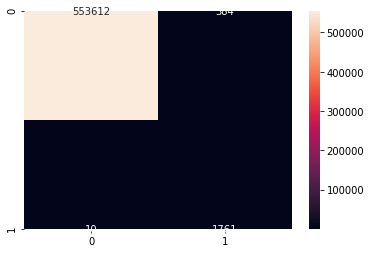

In [66]:
sns.heatmap(confusion_matrix(predict,y_test),annot=True,fmt='d')

In [15]:
tree = DecisionTreeClassifier(random_state = 100, max_depth=8)

In [16]:
tree.fit(X_test1,predict)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

[Text(386.30769230769226, 498.3, 'hist_trans_of_24H_fraud <= 0.5\ngini = 0.006\nsamples = 555767\nvalue = [553996, 1771]'),
 Text(171.69230769230768, 407.70000000000005, 'amt <= 12234.335\ngini = 0.0\nsamples = 554004\nvalue = [553994, 10]'),
 Text(85.84615384615384, 317.1, 'gini = 0.0\nsamples = 553994\nvalue = [553994, 0]'),
 Text(257.53846153846155, 317.1, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(600.9230769230769, 407.70000000000005, 'amt <= 5.43\ngini = 0.002\nsamples = 1763\nvalue = [2, 1761]'),
 Text(429.23076923076917, 317.1, 'hist_trans_of_24H_fraud <= 1.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(343.38461538461536, 226.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(515.0769230769231, 226.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(772.6153846153845, 317.1, 'category_travel <= 0.5\ngini = 0.001\nsamples = 1758\nvalue = [1, 1757]'),
 Text(686.7692307692307, 226.5, 'gini = 0.0\nsamples = 1731\nvalue = [0, 1731]'),
 Text(858.4615384615383, 226.

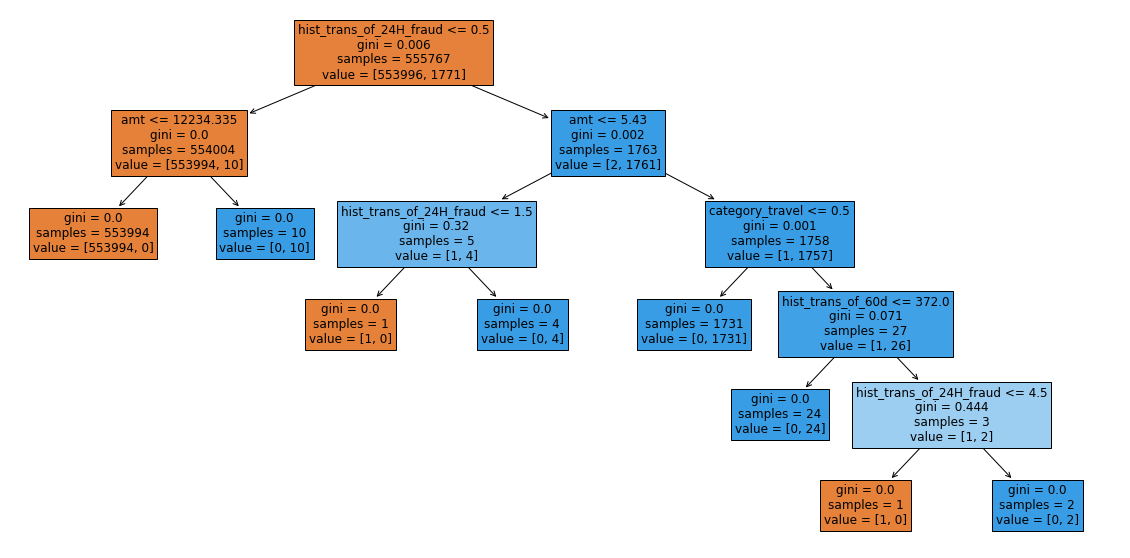

In [17]:
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(tree, feature_names=list(X_test1.columns), precision=3, filled=True, fontsize=12, impurity=True)

In [18]:
print(classification_report(y_test,tree.predict(X_test1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553622
           1       0.99      0.82      0.90      2145

    accuracy                           1.00    555767
   macro avg       1.00      0.91      0.95    555767
weighted avg       1.00      1.00      1.00    555767



In [69]:

# Those values, however, will show that the second parameter
# is more influential

res=np.std(X_test, 0)*lr.coef_

res[0]=res[0]
cols = X_test1.columns
df = pd.DataFrame()
df['cols']=cols
df['important']=res[0]
df.sort_values(by='important',ascending=False).reset_index().drop('index',1)

,cols,important
0,hist_trans_of_24H_fraud,1.922830
1,category_grocery_pos,0.453571
2,category_shopping_net,0.313818
3,category_misc_net,0.270790
4,category_gas_transport,0.254990
5,trans_hour,0.166810
6,amt,0.126342
7,category_shopping_pos,0.111376
8,category_grocery_net,0.094533
9,category_misc_pos,0.068502


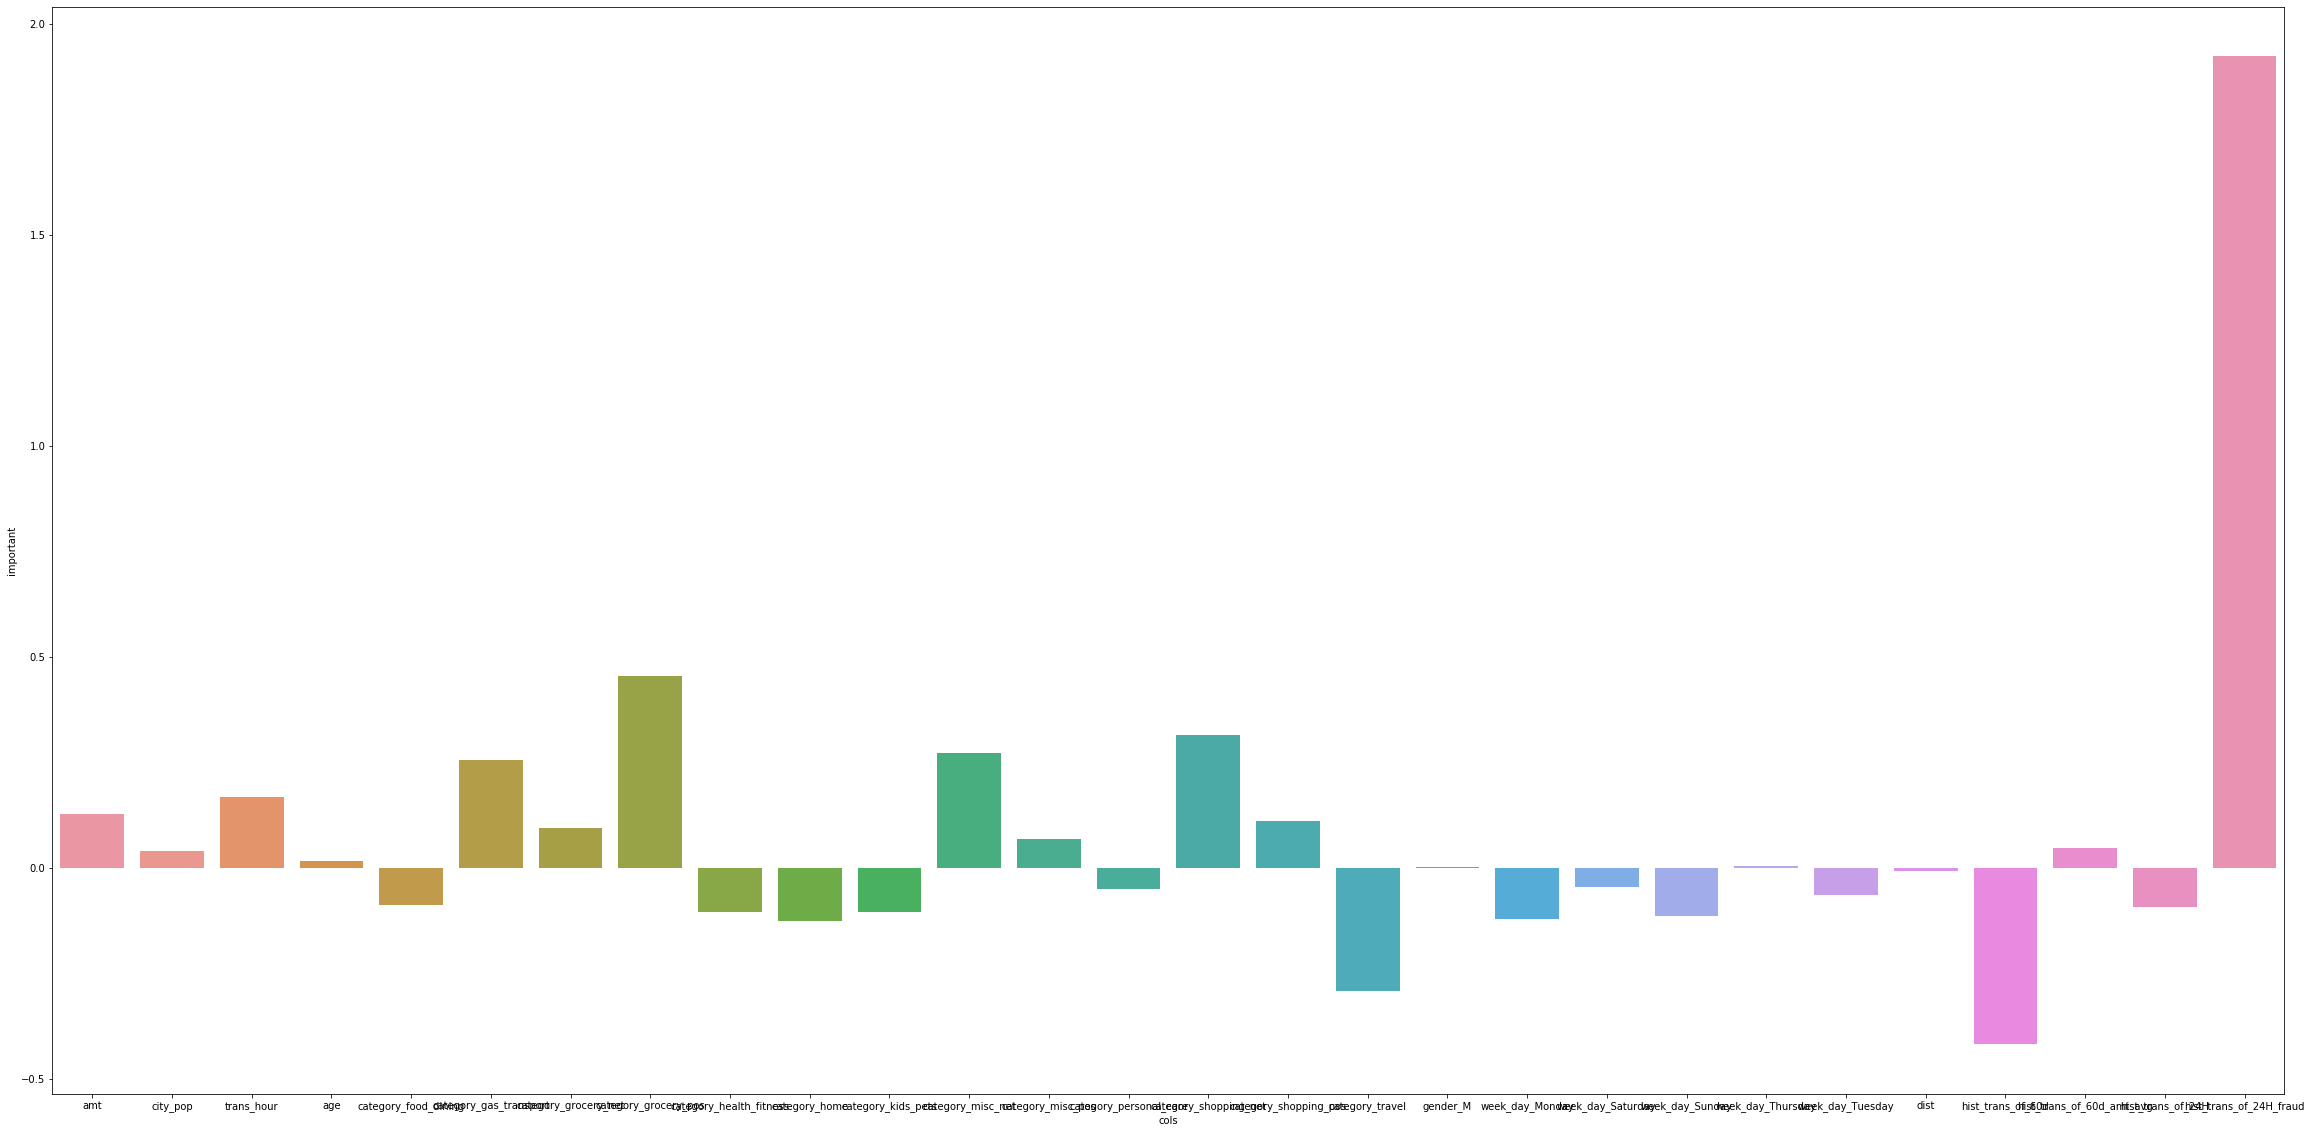

In [70]:
plt.figure(figsize=(40,20))

sns.barplot(df['cols'], df['important'])

In [67]:
X_test1

,amt,city_pop,trans_hour,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,week_day_Monday,week_day_Saturday,week_day_Sunday,week_day_Thursday,week_day_Tuesday,dist,hist_trans_of_60d,hist_trans_of_60d_amt_avg,hist_trans_of_24H,hist_trans_of_24H_fraud
0,2.86,333497,12,52.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,5711.432943,199.0,53.592400,5.0,0.0
1,29.84,302,12,30.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,5286.730110,259.0,57.686768,8.0,0.0
2,41.28,34496,12,50.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5899.301860,315.0,89.035016,7.0,0.0
3,60.05,54767,12,33.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,5552.877440,177.0,70.970838,4.0,0.0
4,3.19,1126,12,65.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,5935.430148,254.0,63.150827,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555762,43.77,519,23,55.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,5755.882168,246.0,62.633684,4.0,0.0
555763,111.84,28739,23,21.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,5395.980970,422.0,48.529764,8.0,0.0
555764,86.88,3684,23,39.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5149.696677,400.0,93.296325,8.0,0.0
555765,7.99,129,23,55.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,5191.938190,318.0,59.034455,3.0,0.0


In [ ]:
!pip install git+https://github.com/SauceCat/PDPbox.git

  Cloning https://github.com/SauceCat/PDPbox.git to /tmp/pip-req-build-3tr75wih
  Running command git clone -q https://github.com/SauceCat/PDPbox.git /tmp/pip-req-build-3tr75wih
     |████████████████████████████████| 13.1MB 238kB/s 
  Created wheel for PDPbox: filename=PDPbox-0.2.1-cp37-none-any.whl size=35759058 sha256=f07bd6f3b0837736723dd9b7da71561c4dcfcbef27a13fbeb647b33979a43d4c
  Stored in directory: /tmp/pip-ephem-wheel-cache-2igj0z7x/wheels/39/f0/89/14e25f3f68e3edab29021bb801571827b0c600c826661a315a
Successfully built PDPbox
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [ ]:
from pdpbox import pdp, get_dataset, info_plots
pdp_trans = pdp.pdp_isolate(model=lr, dataset=X_test1, model_features=X_test1.columns, feature='hist_trans_of_24H_fraud')

pdp.pdp_plot(pdp_trans, 'Total Amount Spent in last 24 Hours', plot_lines=True, frac_to_plot=0.5)
plt.show()

In [13]:
!pip install lime

     |████████████████████████████████| 276kB 4.2MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp37-none-any.whl size=283858 sha256=79d86c2d6c6b99bf348fbf9a9469152def94720c928f039669a2668b92501e83
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully built lime


In [23]:
import lime
import lime.lime_tabular as lb
from __future__ import print_function

In [24]:
predict_fn_logreg = lambda x: lr.predict_proba(x).astype(float)

In [43]:
[cols[-1]]

['is_fraud']

In [25]:
test1=test[cols]

In [27]:
X = X_test1.values
explainer = lime.lime_tabular.LimeTabularExplainer(X,feature_names =X_test1.columns, class_names = ['is_fraud'], kernel_width = 5)

In [28]:
test[test.is_fraud==1]

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,week_day,year_month,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,week_day_Monday,week_day_Saturday,week_day_Sunday,week_day_Thursday,week_day_Tuesday,week_day_Wednesday,dist,val_aggr,trans_date,hist_trans_of_60d,hist_trans_of_60d_amt_avg,hist_trans_of_24H,hist_trans_of_24H_fraud,hist_trans_of_2H,trans_hour
1685,1298400,2020-06-21 22:06:39,3560725013359375,fraud_Hamill-D'Amore,health_fitness,24.84,Brooke,Smith,F,63542 Luna Brook Apt. 012,Notrees,TX,79759,31.8599,-102.7413,23,Cytogeneticist,1969-09-15 00:00:00,16bf2e46c54369a8eab2214649506425,1371852399,32.575873,-102.604290,1,Sunday,2020-06,51.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,5295.933826,1,2020-06-21,224.0,72.819286,4.0,3.0,1.0,22
1767,1298482,2020-06-21 22:32:22,6564459919350820,"fraud_Rodriguez, Yost and Jenkins",misc_net,780.52,Douglas,Willis,M,619 Jeremy Garden Apt. 681,Benton,WI,53803,42.5545,-90.3508,1306,Public relations officer,1958-09-10 00:00:00,ab4b379d2c0c9c667d46508d4e126d72,1371853942,42.461127,-91.147148,1,Sunday,2020-06,62.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,5827.232638,1,2020-06-21,67.0,94.160597,5.0,2.0,3.0,22
1781,1298496,2020-06-21 22:37:27,6564459919350820,fraud_Nienow PLC,entertainment,620.33,Douglas,Willis,M,619 Jeremy Garden Apt. 681,Benton,WI,53803,42.5545,-90.3508,1306,Public relations officer,1958-09-10 00:00:00,47a9987ae81d99f7832a54b29a77bf4b,1371854247,42.771834,-90.158365,1,Sunday,2020-06,62.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,5827.300315,1,2020-06-21,67.0,94.160597,3.0,2.0,1.0,22
1784,1298499,2020-06-21 22:38:55,4005676619255478,"fraud_Heathcote, Yost and Kertzmann",shopping_net,1077.69,William,Perry,M,458 Phillips Island Apt. 768,Denham Springs,LA,70726,30.4590,-90.9027,71335,Herbalist,1994-05-31 00:00:00,fe956c7e4a253c437c18918bf96f7b62,1371854335,31.204974,-90.261595,1,Sunday,2020-06,26.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,5517.024594,1,2020-06-21,308.0,72.938932,8.0,0.0,2.0,22
1857,1298572,2020-06-21 23:02:16,3560725013359375,fraud_Hermann and Sons,shopping_pos,842.65,Brooke,Smith,F,63542 Luna Brook Apt. 012,Notrees,TX,79759,31.8599,-102.7413,23,Cytogeneticist,1969-09-15 00:00:00,f6838c01f5d2262006e6b71d33ba7c6d,1371855736,31.315782,-102.736390,1,Sunday,2020-06,51.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,5300.961251,1,2020-06-21,224.0,72.819286,5.0,4.0,1.0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517243,1813958,2020-12-22 22:05:48,2242176657877538,"fraud_Willms, Kris and Bergnaum",shopping_pos,1041.51,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,MS,38668,34.6323,-89.8855,14462,Database administrator,1959-03-03 00:00:00,35b0297dd026d2e9a75d024a5dec7955,1387749948,34.573471,-89.911011,1,Tuesday,2020-12,62.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,5643.349555,1,2020-12-22,3.0,466.405000,4.0,3.0,1.0,22
517320,1814035,2020-12-22 22:18:07,2242176657877538,fraud_Kuhn LLC,shopping_pos,868.09,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,MS,38668,34.6323,-89.8855,14462,Database administrator,1959-03-03 00:00:00,da7f67d7375f10a054a3d919448c45dd,1387750687,34.091227,-90.390612,1,Tuesday,2020-12,62.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,5643.349442,1,2020-12-22,3.0,466.405000,5.0,4.0,1.0,22
517387,1814102,2020-12-22 22:31:48,2242176657877538,"fraud_Mosciski, Ziemann and Farrell",shopping_net,1039.42,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,MS,38668,34.6323,-89.8855,14462,Database administrator,1959-03-03 00:00:0

In [29]:
chosen_index = X_test1.index[1685]
chosen_instance = X_test1.loc[chosen_index].values
# Use the LIME explainer to explain the data point
exp = explainer.explain_instance(chosen_instance, predict_fn_logreg, num_features = 10)
exp.show_in_notebook(show_all=False)

In [45]:
data_train = pd.read_csv('/content/gdrive/MyDrive/Transaction data/preprocessed_data.csv') #This is the train dataset

In [46]:
data_train=data_train[cols]

In [47]:
data_train.head()

,amt,city_pop,trans_hour,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,week_day_Monday,week_day_Saturday,week_day_Sunday,week_day_Thursday,week_day_Tuesday,dist,hist_trans_of_60d,hist_trans_of_60d_amt_avg,hist_trans_of_24H,hist_trans_of_24H_fraud,is_fraud
0,4.97,3495,0,31.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,5769.599637,1.0,4.970000,5.0,0.0,0
1,107.23,149,0,41.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5254.925202,1.0,47.737903,2.0,0.0,0
2,220.11,4154,0,57.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,5265.935520,8.0,377.925000,5.0,0.0,0
3,45.00,1939,0,52.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,5377.625588,1.0,45.000000,6.0,0.0,0
4,41.96,99,0,33.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,5833.347119,1.0,41.960000,4.0,0.0,0


In [56]:
X_train = data_train.drop('is_fraud',1)
y_train = data_train['is_fraud']

In [57]:
log.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

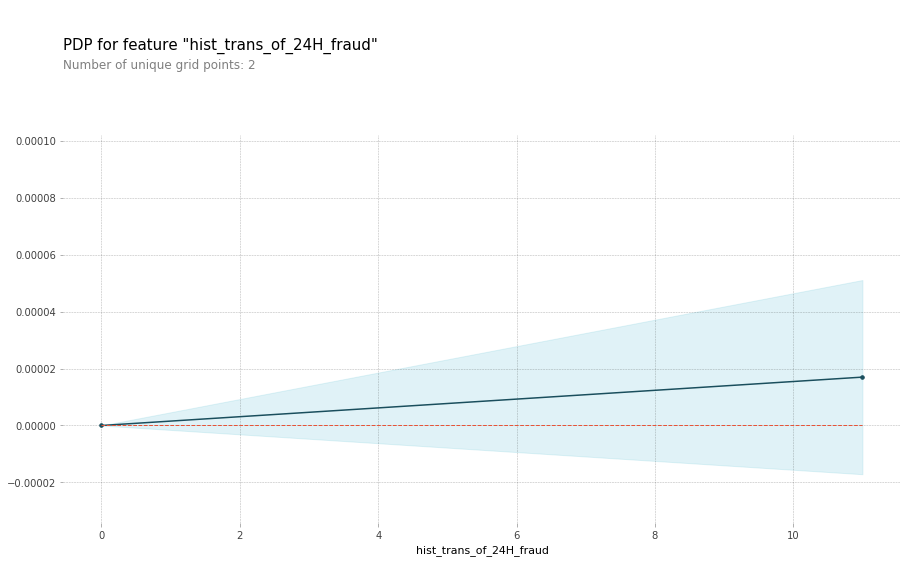

In [58]:
from pdpbox import pdp, get_dataset, info_plots

pdp_resting_bp = pdp.pdp_isolate(model=log, dataset=X_test1, model_features=X_test1.columns, feature='hist_trans_of_24H_fraud')

# plot it
pdp.pdp_plot(pdp_resting_bp, 'hist_trans_of_24H_fraud')

plt.show()

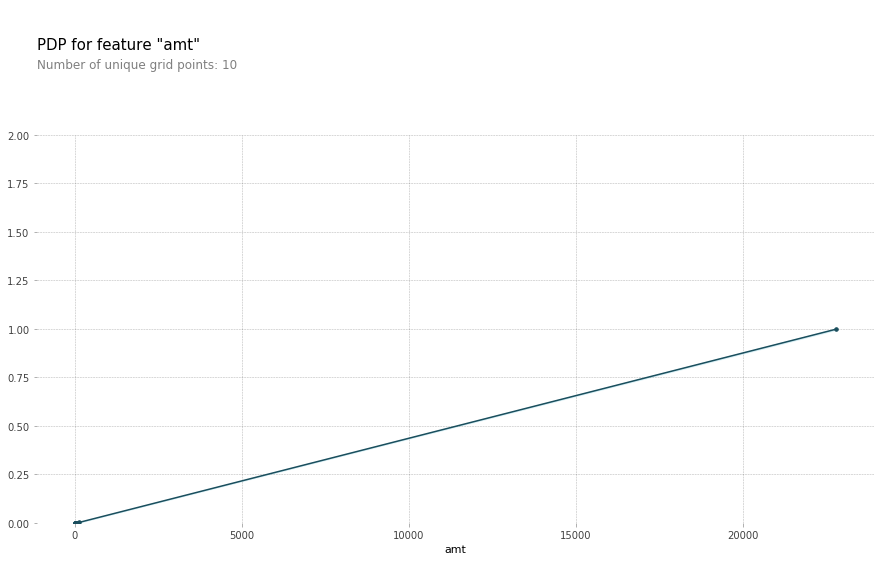

In [61]:
pdp_resting_bp = pdp.pdp_isolate(model=log, dataset=X_test1, model_features=X_test1.columns, feature='amt')

# plot it
pdp.pdp_plot(pdp_resting_bp, 'amt')

plt.show()

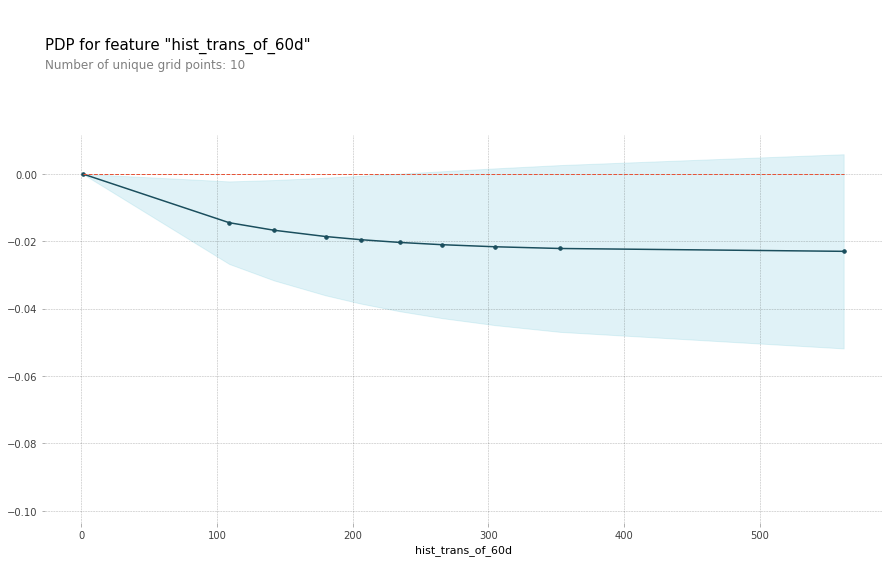

In [62]:
pdp_resting_bp = pdp.pdp_isolate(model=log, dataset=X_test1, model_features=X_test1.columns, feature='hist_trans_of_60d')

# plot it
pdp.pdp_plot(pdp_resting_bp, 'hist_trans_of_60d')

plt.show()

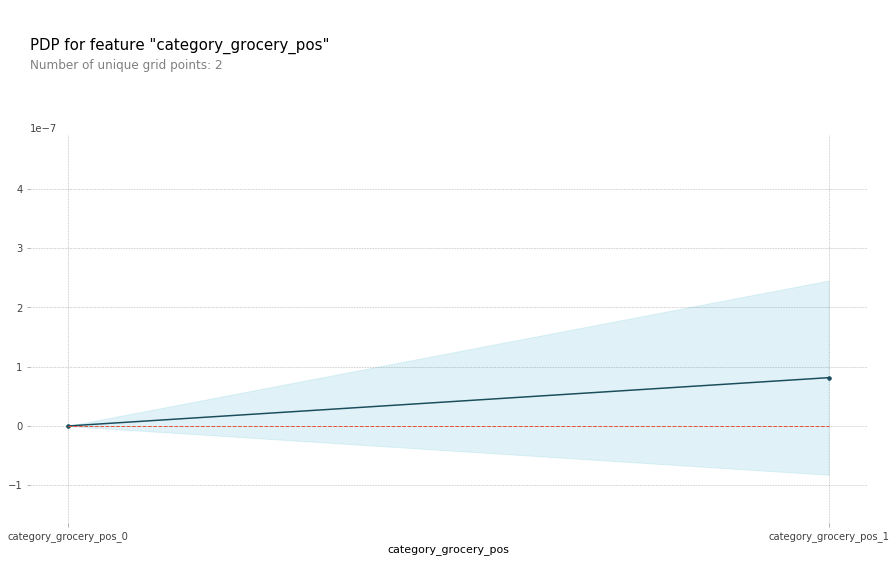

In [63]:
pdp_resting_bp = pdp.pdp_isolate(model=log, dataset=X_test1, model_features=X_test1.columns, feature='category_grocery_pos')

# plot it
pdp.pdp_plot(pdp_resting_bp, 'category_grocery_pos')

plt.show()

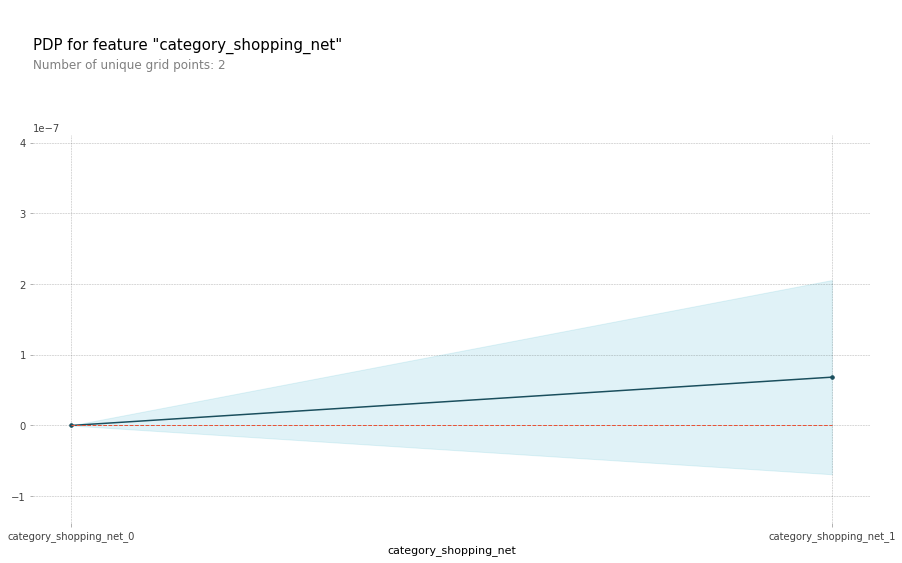

In [64]:
pdp_resting_bp = pdp.pdp_isolate(model=log, dataset=X_test1, model_features=X_test1.columns, feature='category_shopping_net')

# plot it
pdp.pdp_plot(pdp_resting_bp, 'category_shopping_net')

plt.show()